# 와인품종분류기



In [96]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))


In [97]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

# 머신러닝 과정 

- 모듈 임포트 
- 데이타 수집 (학습데이타)
- 데이타 전처리 
- 데이터 학습 (모델화)
- 데이터 예측 (테스트데이타)
- 데이터 테스트 (정답률)

In [48]:
# 학습기 모듈 
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [27]:
# 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이타 수집 

- 사이킷런의 와인데이타셋 이용
- 이탈리아의 같은 지역내의 3개의 다른 경작지에서 재배된 와인의 화학적 분석결과 데이타셋 

In [150]:
from sklearn.datasets import load_wine
wine = load_wine()
# print(wine.DESCR)

In [101]:
# wine

In [105]:
# 데이타프레임 생성
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)

# class 컬럼 생성
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
wine_data['class'] = sy
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [106]:
wine_data.shape

(178, 14)

In [107]:
wine_data['class'].unique()

[class_0, class_1, class_2]
Categories (3, object): [class_0, class_1, class_2]

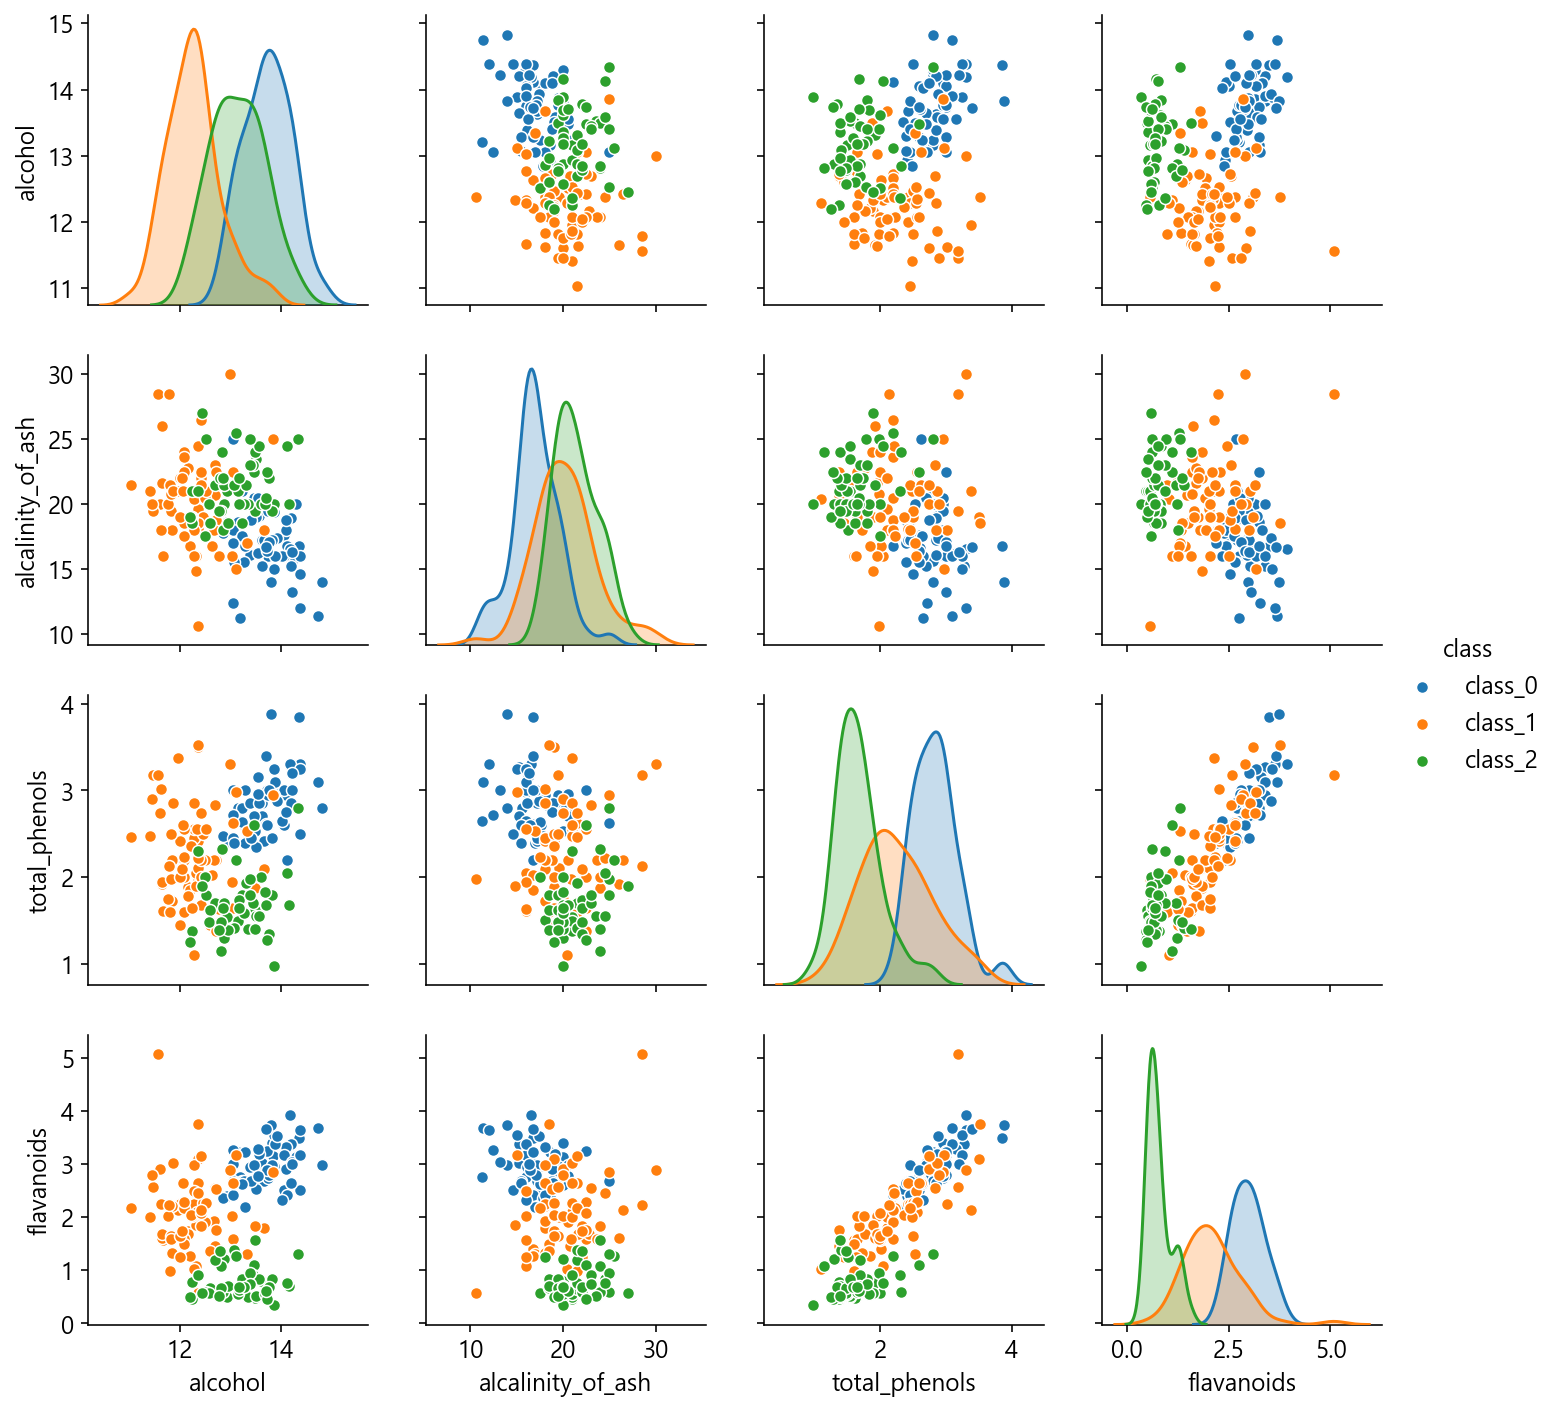

In [110]:
sns.pairplot(vars=["alcohol", "alcalinity_of_ash", \
                       "total_phenols", "flavanoids"], \
             hue="class", data=wine_data)
plt.show()

# 데이타 전처리 

In [128]:
# data = wine_data.iloc[:, :13]
data = wine_data[["alcohol", "alcalinity_of_ash", \
                       "total_phenols", "flavanoids"]]
label = wine_data['class']

In [129]:
# 학습데이타 
data.columns, len(data.columns)

(Index(['alcohol', 'alcalinity_of_ash', 'total_phenols', 'flavanoids'], dtype='object'),
 4)

In [130]:
# 레이블데이타 
label.index

RangeIndex(start=0, stop=178, step=1)

### 학습 전용과 테스트 전용 분리하기 

- 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
- 임포트 
    - from sklearn.model_selection import train_test_split

```
    train_test_split( data, label, 
                       test_size=float, train_size=float, 
                        shuffle=True/False)
```                    

In [131]:
# wine_data = 학습데이타 + 테스트데이타 

x_train, x_test, y_train, y_test \
    = train_test_split(data, label, test_size = 0.2, 
                       train_size = 0.8, 
                       shuffle = True)

In [132]:
x_train.shape, x_test.shape, 

((142, 4), (36, 4))

In [133]:
y_train.shape, y_test.shape

((142,), (36,))

In [134]:
x_train.head()

,alcohol,alcalinity_of_ash,total_phenols,flavanoids
124,11.87,21.0,2.86,3.03
137,12.53,25.0,1.79,0.60
122,12.42,26.5,2.20,2.13
9,13.86,16.0,2.98,3.15
105,12.42,22.0,1.68,1.84


In [135]:
x_test.head()

,alcohol,alcalinity_of_ash,total_phenols,flavanoids
94,11.62,18.0,3.02,2.26
86,12.16,22.8,1.78,1.69
2,13.16,18.6,2.80,3.24
16,14.30,20.0,2.80,3.14
112,11.76,20.0,1.75,2.03


### 데이타 학습  : 모델링

In [136]:
# 학습기 모듈 
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

In [137]:
# 학습기 : KNN(KNeighborsClassifier) 예
# clf = KNeighborsClassifier()
# clf.fit(x_train, y_train)

In [138]:
# 학습기 : 서포트 벡터 머신(support vector machine) 예
# clf = SVC()
# clf.fit(x_train, y_train)

In [139]:
# 학습기 : 랜덤포레스트(RandomForestClassifier) 예
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 데이터 예측 

In [140]:
y_pred = clf.predict(x_test)
y_pred

array(['class_1', 'class_1', 'class_0', 'class_0', 'class_1', 'class_1',
       'class_1', 'class_2', 'class_1', 'class_2', 'class_1', 'class_1',
       'class_0', 'class_2', 'class_0', 'class_0', 'class_0', 'class_2',
       'class_1', 'class_2', 'class_1', 'class_1', 'class_0', 'class_0',
       'class_1', 'class_2', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_1', 'class_0', 'class_1', 'class_0', 'class_2', 'class_1'],
      dtype=object)

In [145]:
x_train.iloc[15], y_train[15]

(alcohol              14.20
 alcalinity_of_ash    15.20
 total_phenols         3.27
 flavanoids            3.39
 Name: 5, dtype: float64, 'class_0')

In [146]:
clf.predict([[14.20, 15.20, 3.27, 3.39]])

array(['class_0'], dtype=object)

### 결과 확인 

metrics.accuracy_score(label, clf.predict(data))

In [147]:
print("정답률 = " , accuracy_score(y_test, y_pred))

정답률 =  0.8611111111111112


In [148]:
# 정답률 
print(f'정답률은? \
          {round(accuracy_score(y_test, y_pred),2)*100} %')

정답률은?           86.0 %
